In [1]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

# Get Data 
---

In [2]:
prices = pd.read_csv("binance_data/L1/2024/1h/merged_L1_closing_prices.csv", index_col=0, parse_dates=True)

# Applly funnel and test for cointegration
---

In [3]:

# Pre-filter: Calculate correlation matrix and select pairs with high correlation
corr_threshold = 0.8
corr_matrix, high_corr_pairs = filter_high_correlation_pairs(prices, threshold=corr_threshold)
print(f"\nPairs with correlation >= {corr_threshold}:")
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]:.4f}")

# Cointegration test
cointegrated_pairs, pvalue_matrix, residuals_df = find_cointegrated_pairs(prices, high_corr_pairs,significance=0.05)
#cointegrated_pairs, window_results = find_cointegrated_pairs_windows(prices, high_corr_pairs, significance=0.05, window_size=720, min_pass_fraction=0.5)



Pairs with correlation >= 0.8:
SUI/USDT_2024_1h & TRX/USDT_2024_1h: correlation = 0.8638
SUI/USDT_2024_1h & BTC/USDT_2024_1h: correlation = 0.8064
SUI/USDT_2024_1h & ADA/USDT_2024_1h: correlation = 0.8063
ICP/USDT_2024_1h & AVAX/USDT_2024_1h: correlation = 0.8502
BNB/USDT_2024_1h & BTC/USDT_2024_1h: correlation = 0.8325
BNB/USDT_2024_1h & SOL/USDT_2024_1h: correlation = 0.8265
BTC/USDT_2024_1h & SOL/USDT_2024_1h: correlation = 0.9251

Cointegrated pairs (from pre-filtered high-correlation pairs):
ICP/USDT_2024_1h & AVAX/USDT_2024_1h: p-value = 0.0484, correlation = 0.8502


In [4]:
# window_results

In [5]:
pvalue_matrix

,SUI/USDT_2024_1h,NEAR/USDT_2024_1h,ICP/USDT_2024_1h,TRX/USDT_2024_1h,BNB/USDT_2024_1h,BTC/USDT_2024_1h,AVAX/USDT_2024_1h,ETH/USDT_2024_1h,SOL/USDT_2024_1h,ADA/USDT_2024_1h
SUI/USDT_2024_1h,1.000000,1.0,1.000000,0.078351,1.000000,0.731393,1.000000,1.0,1.000000,0.665781
NEAR/USDT_2024_1h,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ICP/USDT_2024_1h,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.048387,1.0,1.000000,1.000000
TRX/USDT_2024_1h,0.078351,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
BNB/USDT_2024_1h,1.000000,1.0,1.000000,1.000000,1.000000,0.420524,1.000000,1.0,0.239847,1.000000
BTC/USDT_2024_1h,0.731393,1.0,1.000000,1.000000,0.420524,1.000000,1.000000,1.0,0.271896,1.000000
AVAX/USDT_2024_1h,1.000000,1.0,0.048387,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
ETH/USDT_2024_1h,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
SOL/USDT_2024_1h,1.000000,1.0,1.000000,1.000000,0.239847,0.271896,1.000000,1.0,1.000000,1.000000
ADA/USDT_2024_1h,0.665781,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [6]:
# cointegrated_pairs = [('BNB/USDT_2024_1h',
#   'BTC/USDT_2024_1h',
#   0.731393,
#   0.8501886494196308)]

In [6]:
#If you suspect daily intraday patterns, using 24 lags is a natural choice: it checks each hour in a 24-hour cycle for dependence.
#If your sample is large enough (covering many days/weeks), 24 lags is typically enough to detect standard intraday correlation
analyze_residuals(residuals_df, lags = 24)

P-value for Ljung-Box test for pair ICP/USDT_2024_1h_AVAX/USDT_2024_1h: 0.9791634198680497
Residuals of pair ICP/USDT_2024_1h_AVAX/USDT_2024_1h are likely white noise (independent).


In [7]:
cointegrated_pairs

[('ICP/USDT_2024_1h',
  'AVAX/USDT_2024_1h',
  np.float64(0.04838690015312888),
  np.float64(0.8501886494196308))]

# Test cointegration function on data designed to be cointegrated
---

In [8]:
import numpy as np
import pandas as pd

def generate_cointegrated_data(
    n=720,  # number of data points
    alpha=5.0,
    beta=1.5,
    phi=0.8,
    seed=42
):
    """
    Generate two cointegrated series: S1 (random walk) and S2 (linear function of S1 + stationary AR(1) noise).
    
    Parameters:
        n (int): Number of observations (e.g. 720 for ~1 month of hourly data).
        alpha (float): Intercept term for S2.
        beta (float): S2 coefficient for S1.
        phi (float): AR(1) coefficient for the noise in S2 - beta*S1. Must be <1 in abs value for stationarity.
        seed (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame with columns ['S1', 'S2'] representing the two cointegrated time series.
    """
    rng = np.random.default_rng(seed)
    
    # 1) Generate S1 as a random walk
    #   S1_t = S1_{t-1} + e1_t
    e1 = rng.normal(loc=0.0, scale=1.0, size=n)
    S1 = np.cumsum(e1)  # cumsum => random walk
    
    # 2) Generate a stationary AR(1) noise for the spread
    #   ARnoise_t = phi * ARnoise_{t-1} + e2_t
    e2 = rng.normal(loc=0.0, scale=1.0, size=n)
    ARnoise = np.zeros(n)
    for t in range(1, n):
        ARnoise[t] = phi * ARnoise[t-1] + e2[t]
    # ARnoise is stationary if |phi| < 1
    
    # 3) Define S2 = alpha + beta*S1 + AR(1) noise
    S2 = alpha + beta*S1 + ARnoise
    
    # Put them in a DataFrame
    df = pd.DataFrame({'S1': S1, 'S2': S2})
    return df

# Example usage
if __name__ == "__main__":
    df_cointegrated = generate_cointegrated_data(n=720)
    print(df_cointegrated.head(10))


         S1        S2
0  0.304717  5.457076
1 -0.735267  5.025118
2  0.015184  3.644453
3  0.955749  3.834326
4 -0.995286  0.504747
5 -2.297466  0.613121
6 -2.169625  1.275605
7 -2.485868  1.662549
8 -2.502669  0.418916
9 -3.355713 -1.814769


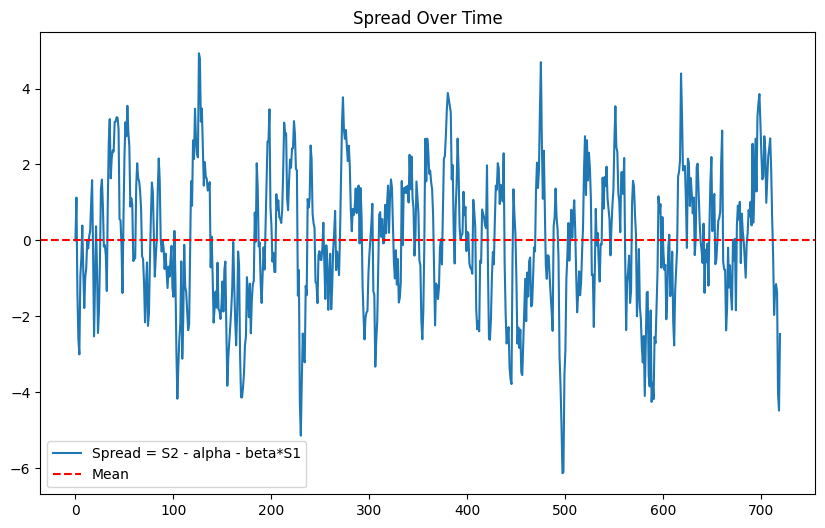

In [15]:
# Suppose df has columns: 'S1', 'S2'
alpha = 5.0
beta = 1.5

# Calculate the spread: S2 - (alpha + beta * S1)
df_cointegrated['spread'] = df_cointegrated['S2'] - alpha - beta * df_cointegrated['S1']

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_cointegrated['spread'], label='Spread = S2 - alpha - beta*S1')
plt.axhline(df_cointegrated['spread'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Spread Over Time')
plt.legend()
plt.show()


# Windows
---

In [3]:
high_corr_pairs = []

In [11]:
cointegrated_pairs, window_results = find_cointegrated_pairs_windows(df_cointegrated, high_corr_pairs, significance=0.05, window_size=240, min_pass_fraction=0.5)


Cointegrated pairs (across windows):
S1 & S2: pass fraction=1.00, avg p-value=0.0002, correlation=0.0


In [24]:
window_results

{('S1', 'S2'): [np.float64(0.0001571978277419794),
  np.float64(0.00010167769924440947),
  np.float64(0.00028916257346243534)]}

# Test cointegration on actual data
---

In [13]:
cointegrated_pairs, window_results = find_cointegrated_pairs_windows(prices, high_corr_pairs, significance=0.05, window_size=720, min_pass_fraction=0.5)


No cointegrated pairs found across the windows.


In [14]:
window_results

{('SUI/USDT_2024_1h', 'NEAR/USDT_2024_1h'): [np.float64(0.7554479823447612),
  np.float64(0.5599364614504867),
  np.float64(0.5880185380078121),
  np.float64(0.8784209977682095),
  np.float64(0.2544180986912208),
  np.float64(0.3868598816637523),
  np.float64(0.36609883581587477),
  np.float64(0.856408223312862),
  np.float64(0.19746239298574686),
  np.float64(0.3896022691946864),
  np.float64(0.8297353385657869),
  np.float64(0.36794238365638465)],
 ('SUI/USDT_2024_1h', 'ICP/USDT_2024_1h'): [np.float64(0.8561135930122677),
  np.float64(0.29712992745208344),
  np.float64(0.3792211384194448),
  np.float64(0.11540194313814267),
  np.float64(0.043885708497187044),
  np.float64(0.4287220575785378),
  np.float64(0.4909517037853896),
  np.float64(0.860008753434305),
  np.float64(0.6772824866455445),
  np.float64(0.2461813739240084),
  np.float64(0.9593790186123321),
  np.float64(0.5246551933341387)],
 ('SUI/USDT_2024_1h', 'TRX/USDT_2024_1h'): [np.float64(0.1931910453981452),
  np.float64(0.4

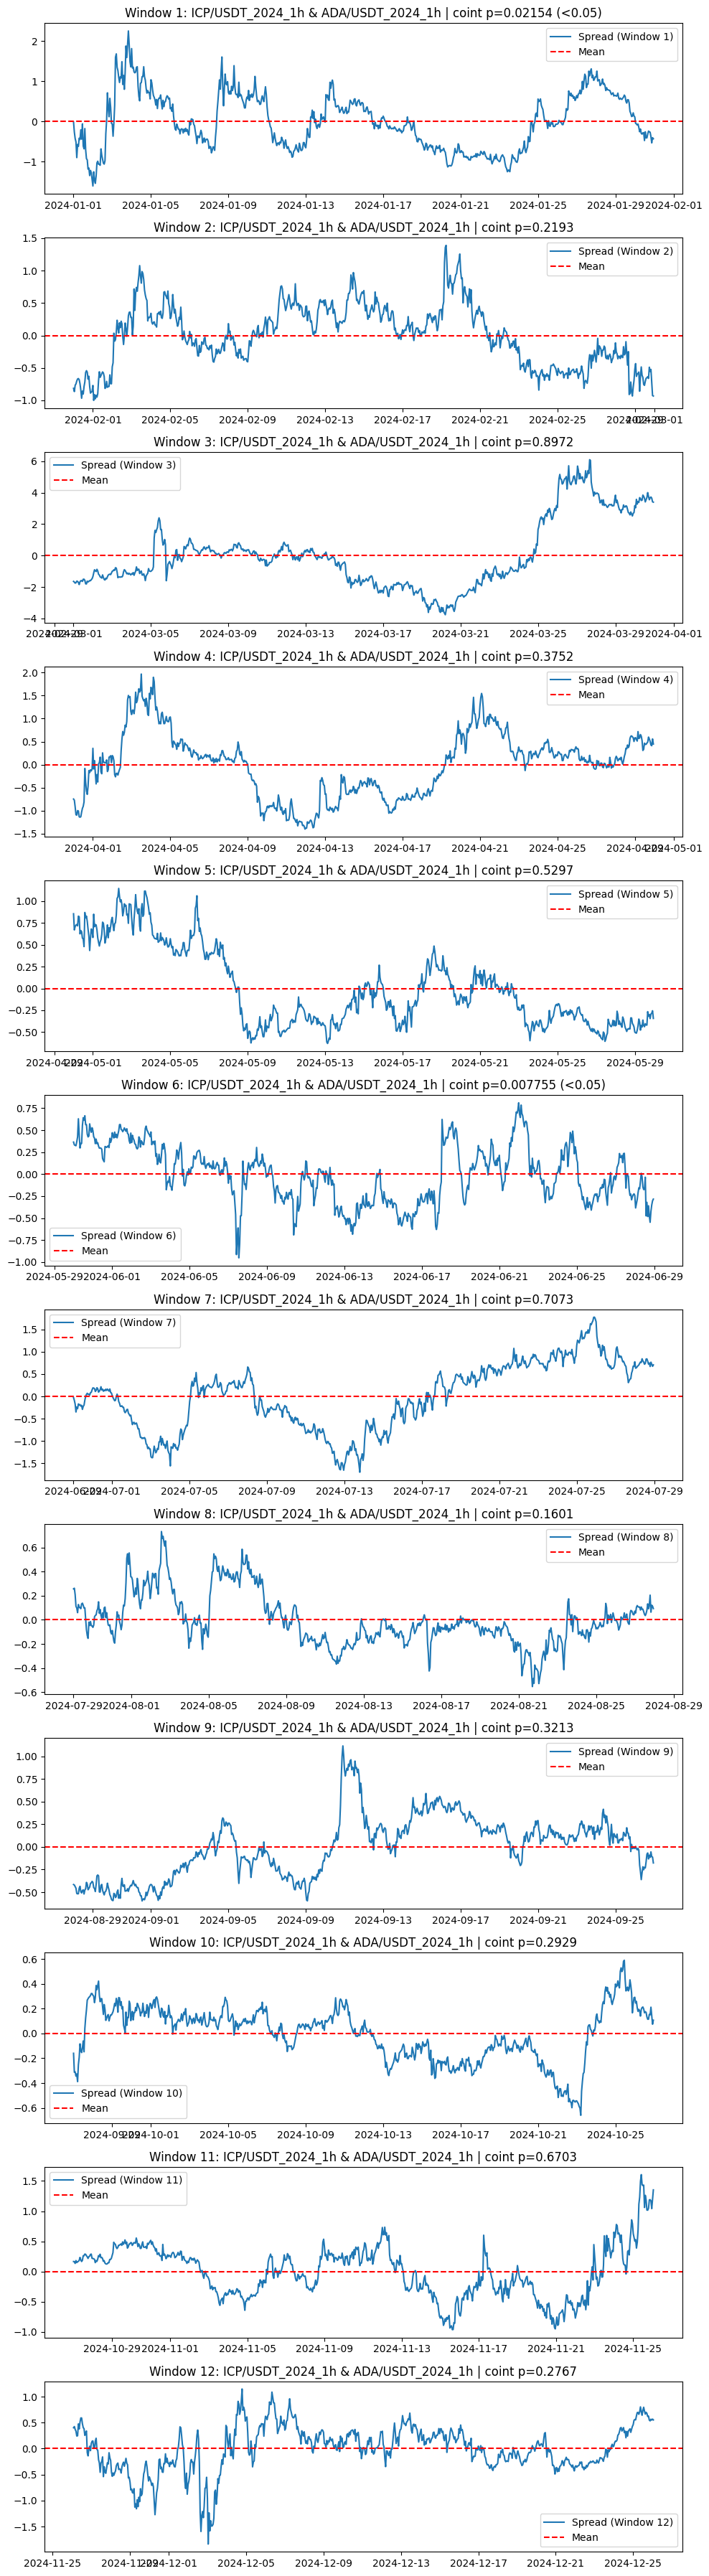

In [16]:
windows = split_price_series_into_windows(prices, window_size=720)

#For ICP/USDT_2024_1h', 'ADA/USDT_2024_1h
plot_spread_in_windows('ICP/USDT_2024_1h', 'ADA/USDT_2024_1h', windows, window_results, significance=0.05)
#plot_spread_in_windows('S1', 'S2', windows, window_results, significance=0.05)

# New Code

In [ ]:
# if cointegrated_pairs:
#         sym1, sym2, pvalue, corr_val = cointegrated_pairs[0]
#         print(f"\nTesting strategy on pair: {sym1} and {sym2} (p-value: {pvalue:.4f}, correlation: {corr_val:.4f})")
#         S1 = prices[sym1]
#         S2 = prices[sym2]

#         #Only look at the first 1000 points for now
#         S1 = S1[:720]
#         S2 = S2[:720]
        
#         # Compute the spread series and beta_series 
#         spread_series, beta_series = compute_spread_series(S1, S2, window_size=720)
#         #print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")
        
#         # Generate trading signals based on the spread's z-score
#         zscore_series, positions_series = backtest_pair_rolling(spread_series, window_size=720, entry_threshold=1.0, exit_threshold=0.0)
        
#         # Simulate strategy performance
#         #pnl, cum_pnl = simulate_strategy(S1, S2, positions, beta)
        
#         pnl, cum_pnl = simulate_true_strategy_rolling(S1, S2, positions_series, beta_series)
        
#         #Plot trading simulation
#         plot_trading_simulation(S1, S2, sym1,sym2,zscore_series, positions_series, cum_pnl)

## OLD CODE

In [17]:
# if cointegrated_pairs:
#         sym1, sym2, pvalue, corr_val = cointegrated_pairs[0]
#         print(f"\nTesting strategy on pair: {sym1} and {sym2} (p-value: {pvalue:.4f}, correlation: {corr_val:.4f})")
#         S1 = prices[sym1]
#         S2 = prices[sym2]

#         #Only look at the first 1000 points for now
#         # S1 = S1[:720]
#         # S2 = S2[:720]
        
#         # Compute the spread and hedge ratio
#         spread, beta = compute_spread(S1, S2)
#         print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")
        
#         # Generate trading signals based on the spread's z-score
#         zscore, positions = backtest_pair(spread, entry_threshold=1, exit_threshold=0.0)
        
#         # Simulate strategy performance
#         #pnl, cum_pnl = simulate_strategy(S1, S2, positions, beta)

#         pnl, cum_pnl = simulate_true_strategy(S1, S2, positions, beta)
        
#         #Plot trading simulation
#         plot_trading_simulation(S1, S2, sym1,sym2,zscore, positions, cum_pnl)

In [18]:
# spread_series, beta_series = compute_spread_series(S1, S2, window_size=720)